In [210]:
import pandas as pd
from prophet import Prophet
import numpy as np
import os
import sys
sys.path.append('../')
import config

In [211]:
df = pd.read_csv('../../data/data_daily_with_aqi.csv')

In [212]:
target = 'AQI'
city ='北京'
df_tgt = df[df.type==target].drop('type',axis=1)
df_tgt_ct = df_tgt[['date',city]].rename(columns={'date':'ds',city:'y'})
df_tgt_ct = df_tgt_ct[df_tgt_ct.ds<'2022-01-01']

In [213]:
df_tgt_ct.tail()


,ds,y
14204,2021-12-27,56.0
14209,2021-12-28,69.0
14214,2021-12-29,53.0
14219,2021-12-30,35.0
14224,2021-12-31,59.0


In [214]:
fraction = 0.8
y_train = df_tgt_ct[:int(len(df_tgt_ct)*fraction)]
y_val = df_tgt_ct[int(len(df_tgt_ct)*fraction):]

In [215]:
m = Prophet()
m.fit(y_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -25.8215
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      92       2756.98   6.16052e-08       88.2441      0.1715      0.9324      119   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [228]:
future = m.make_future_dataframe(periods=5)
future.tail()

,ds
1939,2020-06-09
1940,2020-06-10
1941,2020-06-11
1942,2020-06-12
1943,2020-06-13


In [217]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,ds,yhat,yhat_lower,yhat_upper
2503,2021-12-25,105.369487,14.127261,197.341944
2504,2021-12-26,92.595100,1.915176,181.360919
2505,2021-12-27,93.139325,0.228339,186.590179
2506,2021-12-28,94.018516,1.278583,183.957030
2507,2021-12-29,96.844877,5.104220,187.178260


<Figure size 864x432 with 0 Axes>

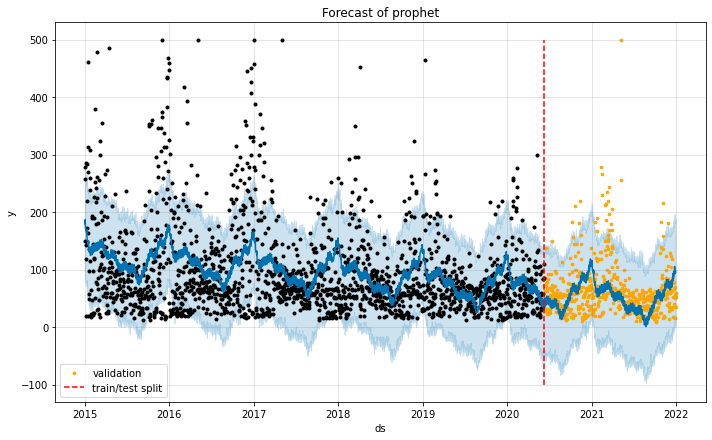

In [218]:
import matplotlib.pyplot as plt
fig1 = plt.figure(figsize=(12,6))
m.plot(forecast)
plt.scatter(pd.to_datetime(y_val.ds),y_val.y,color='orange',s=7,label='validation')
plt.vlines(pd.to_datetime(y_val.ds.values[0]),-100,500, colors = "red", linestyles = "dashed",label='train/test split')
plt.legend()
plt.title('Forecast of {}'.format('prophet'))
plt.savefig('../time_series/pic/day/prophet_daily.png')
plt.show()


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



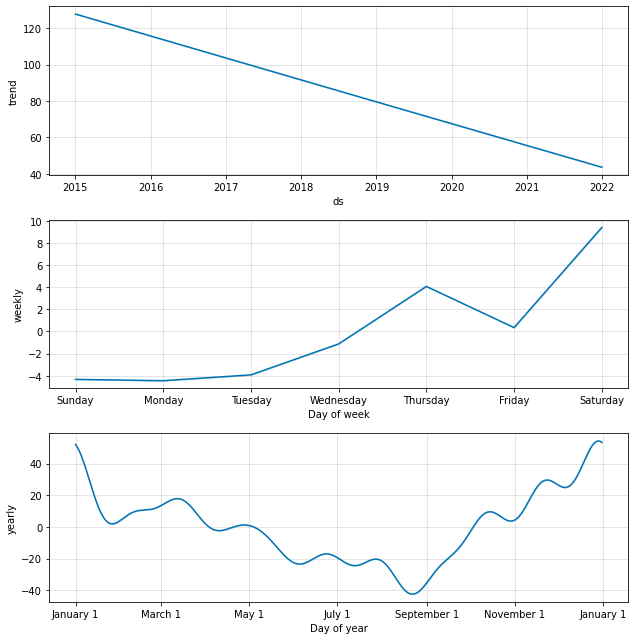

In [219]:
fig2 = m.plot_components(forecast)
plt.savefig('../time_series/pic/day/prophet_decom.png')

In [220]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [221]:
plot_components_plotly(m, forecast)


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [222]:
forecast['ds'] = forecast.ds.apply(lambda x: str(x)[:10])
y_val['ds'] = y_val.ds.apply(str)
y_val.set_index('ds',inplace=True)
forecast.set_index('ds',inplace=True)
t = y_val.join(forecast,on='ds').loc[:,['y','yhat']].dropna(how='any')
from metrics import calc_metric
calc_metric(t.y,t.yhat,'prophet').to_csv('../result/prophet_daily.csv')

/var/folders/l4/lww9t45j5qx1j3mc1k2mh6100000gn/T/ipykernel_40367/1917815285.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

